## Supervised Learning
## Project: House Price Prediction

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the kaggle data.

In [49]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# Pretty display for notebooks
%matplotlib inline

# Load the Kaggle dataset
myData = pd.read_csv("train.csv")

# Success - Display the first record
display(myData.head(n=10))
myData.info()
myData.isnull().sum()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

### Implementation: Data Exploration


In [50]:
target = 'TARGET(PRICE_IN_LACS)'

# Total number of records
n_records = len(myData)

# Number of records where individual's income is more than $45
n_greater_45 = len(myData[myData[target] > 50])

# Number of records where individual's income is at most $45
n_at_most_45 = len(myData[myData[target] <= 50])

# Percentage of individuals whose income is more than $45
greater_percent = n_greater_45/n_records * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50: {}".format(n_greater_45))
print("Individuals making at most $50: {}".format(n_at_most_45))
print("Percentage of individuals making more than $50: {:.3f}%".format(greater_percent))

myData.describe()

Total number of records: 29451
Individuals making more than $50: 17693
Individuals making at most $50: 11758
Percentage of individuals making more than $50: 60.076%


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


### Add Column CITY

In [51]:
myData['CITY'] = myData['ADDRESS'].str.split(',').str[-1]
myData.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,Kolkata


In [52]:
cat_col=[]
print("[1] Object:-\n")
print("="*30)
for col in myData.select_dtypes(include='object'):
    if(col!=target):
        print(f"{col:20} [ {myData[col].nunique():10} unique values ]")
        cat_col.append(col)
        
print("Values:-\n")
print("POSTED_BY", myData['POSTED_BY'].unique())
print("BHK_OR_RK", myData['BHK_OR_RK'].unique())
print("ADDRESS", myData['ADDRESS'].unique())
print("="*80)

num_cat_col=[]
print("[2] Int:-\n")
print("="*30)
for col in myData.select_dtypes(include='int64'):
    if(col!=target):
        print(f"{col:20} [ {myData[col].nunique():10} unique values ]")
        num_cat_col.append(col)

print("Values:-\n")
print("UNDER_CONSTRUCTION", myData['UNDER_CONSTRUCTION'].unique())
print("RERA", myData['RERA'].unique())
print("BHK_NO", myData['BHK_NO.'].unique())
print("READY_TO_MOVE", myData['READY_TO_MOVE'].unique())
print("RESALE", myData['RESALE'].unique())
print("="*80)

num_col=[]
print("[2] Float:-\n")
print("="*30)
for col in myData.select_dtypes(include='float64'):
    if(col!=target):
        print(f"{col:20} [ {myData[col].nunique():10} unique values ]")
        num_col.append(col)

print("Values:- \n")
print("SQUARE_FT", myData['SQUARE_FT'].unique())
print("LONGITUDE", myData['LONGITUDE'].unique())
print("LATITUDE", myData['LATITUDE'].unique())

POSTED_BY            ---->          3 unique values
BHK_OR_RK            ---->          2 unique values
ADDRESS              ---->       6899 unique values
CITY                 ---->        256 unique values


Values in POSTED_BY ['Owner' 'Dealer' 'Builder']
Values in BHK_OR_RK ['BHK' 'RK']
Values in ADDRESS ['Ksfc Layout,Bangalore' 'Vishweshwara Nagar,Mysore' 'Jigani,Bangalore'
 ... 'west mambalam,Chennai' 'Gandhi Nagar,Gulbarga'
 'E3-108, Lake View Recidency,,Vapi']
UNDER_CONSTRUCTION   ---->          2 unique values
RERA                 ---->          2 unique values
BHK_NO.              ---->         16 unique values
READY_TO_MOVE        ---->          2 unique values
RESALE               ---->          2 unique values


Values in UNDER_CONSTRUCTION [0 1]
Values in RERA [0 1]
Values in BHK_NO [ 2  3  1  4  5  6 12  8 20 10  7  9 13 17 15 11]
Values in READY_TO_MOVE [1 0]
Values in RESALE [1 0]
SQUARE_FT            ---->      19561 unique values
LONGITUDE            ---->       4087

### Visualize the data

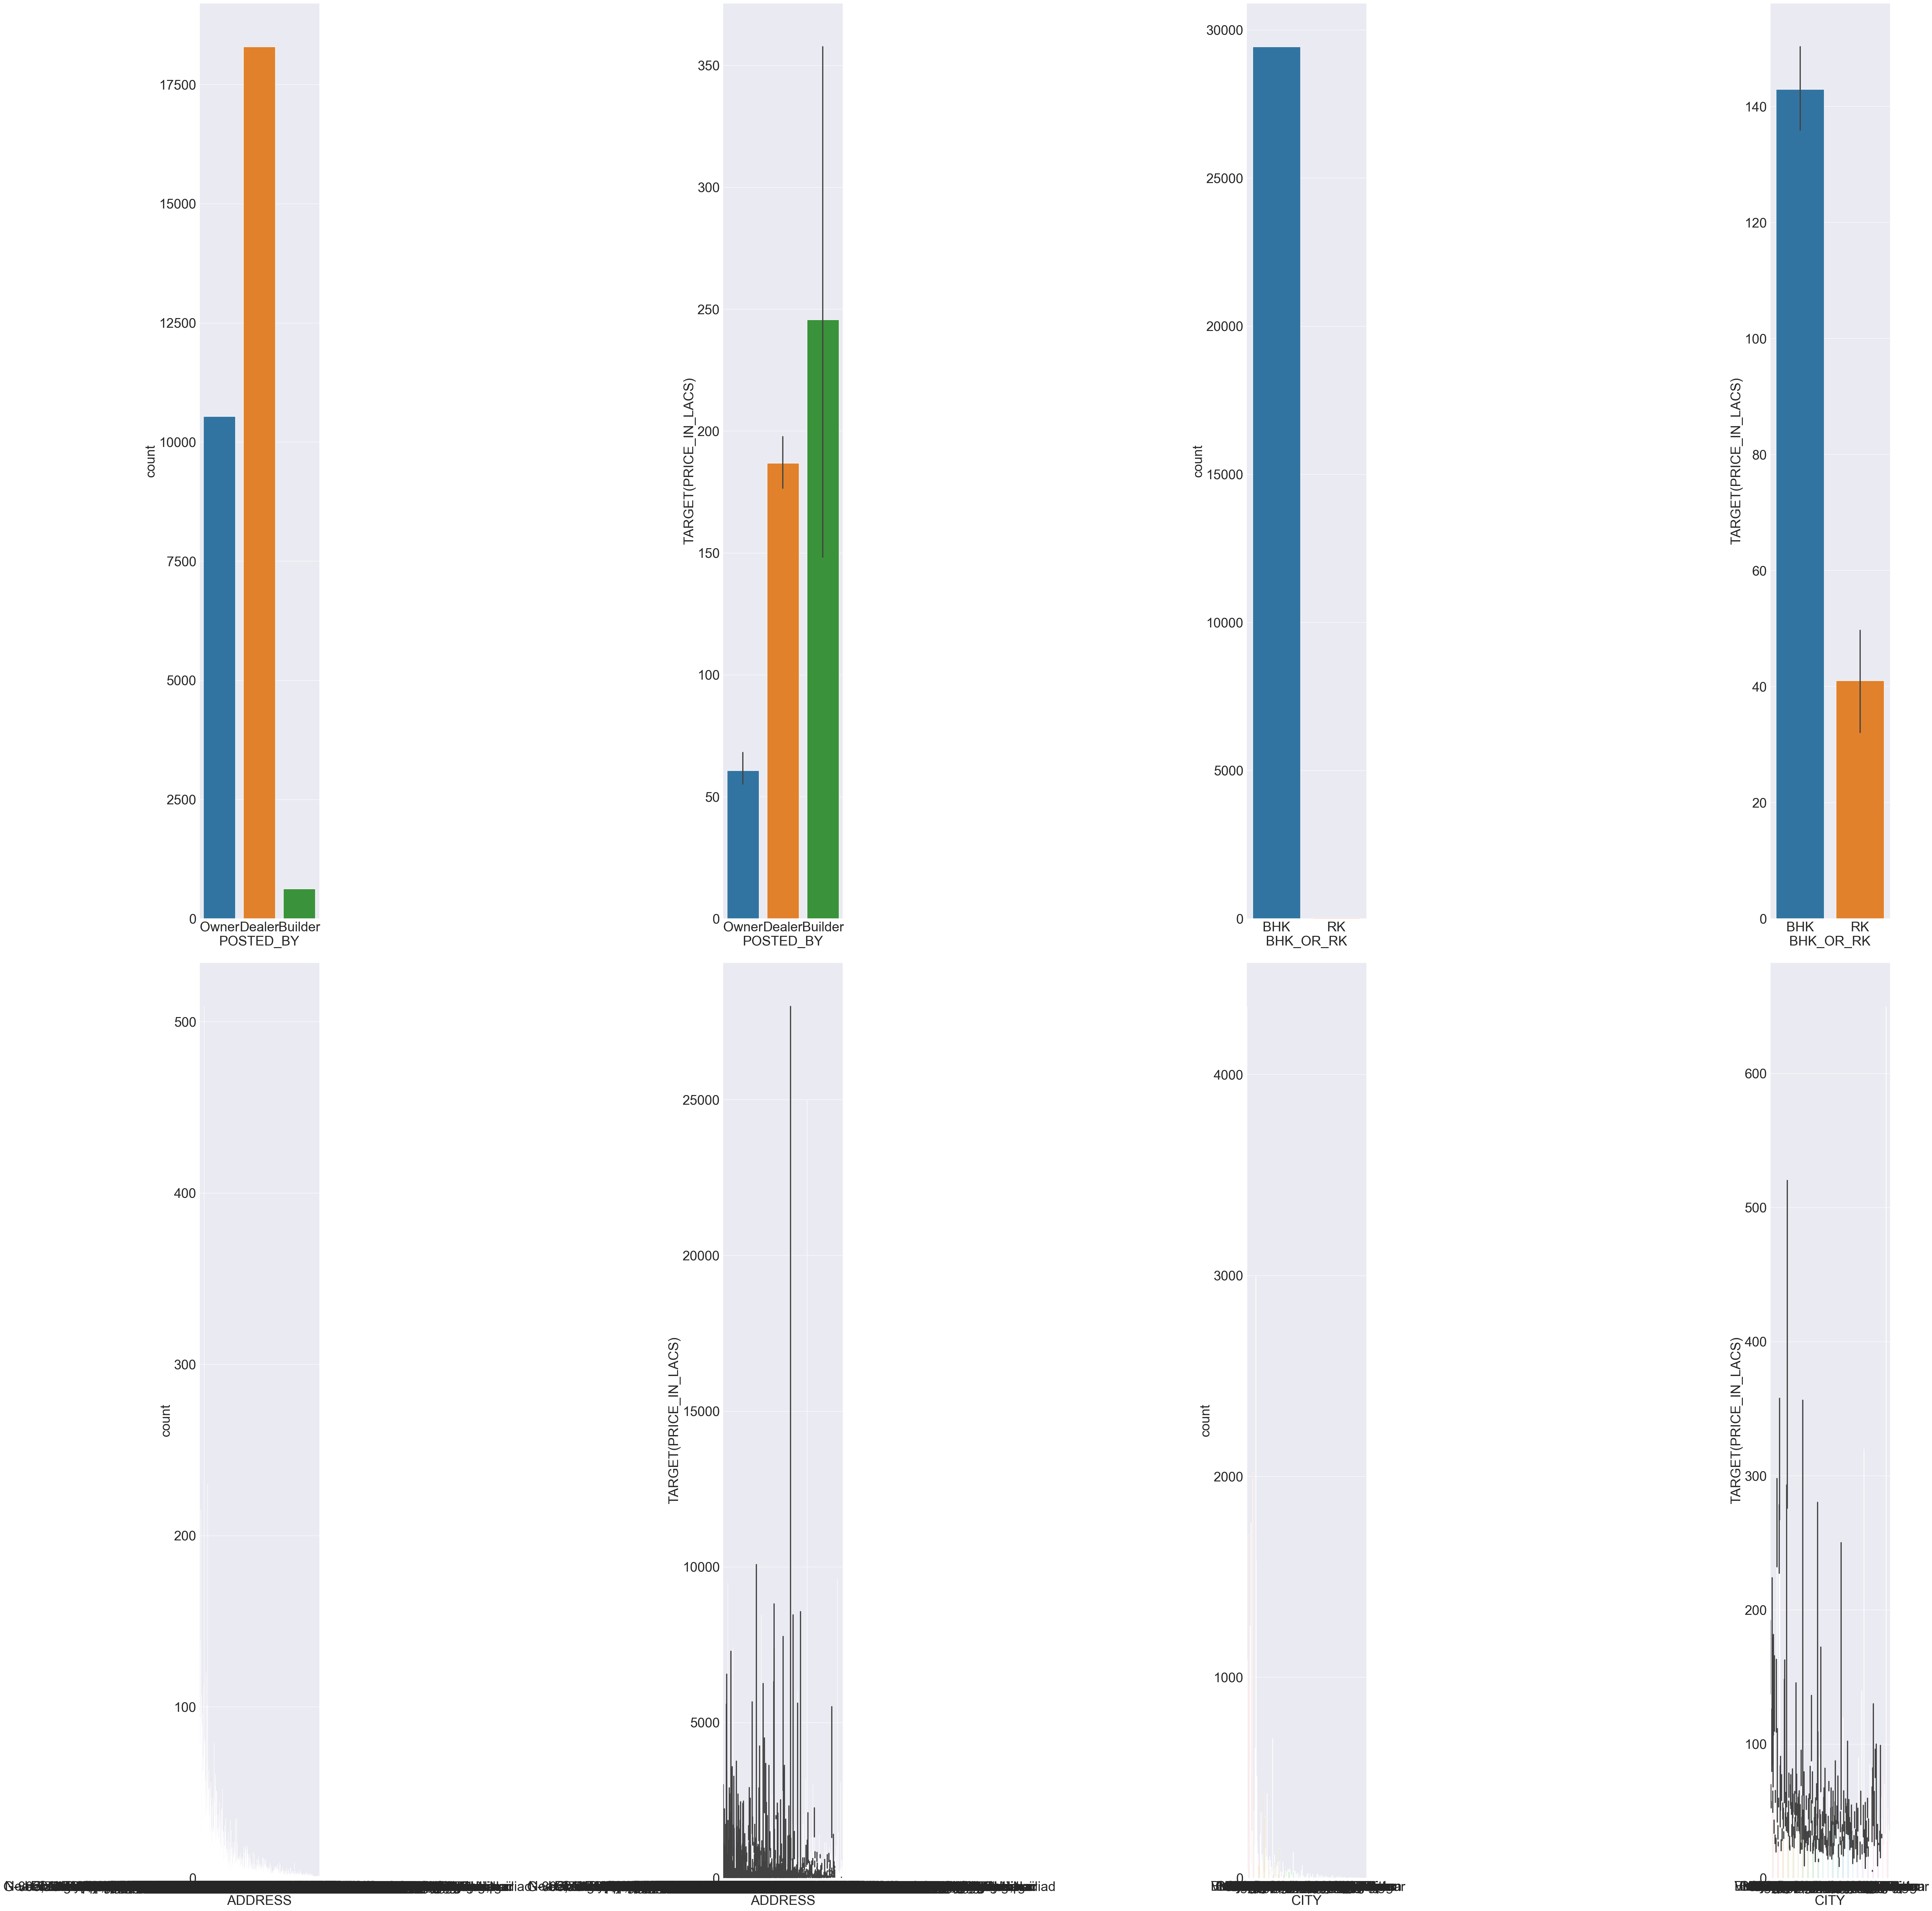

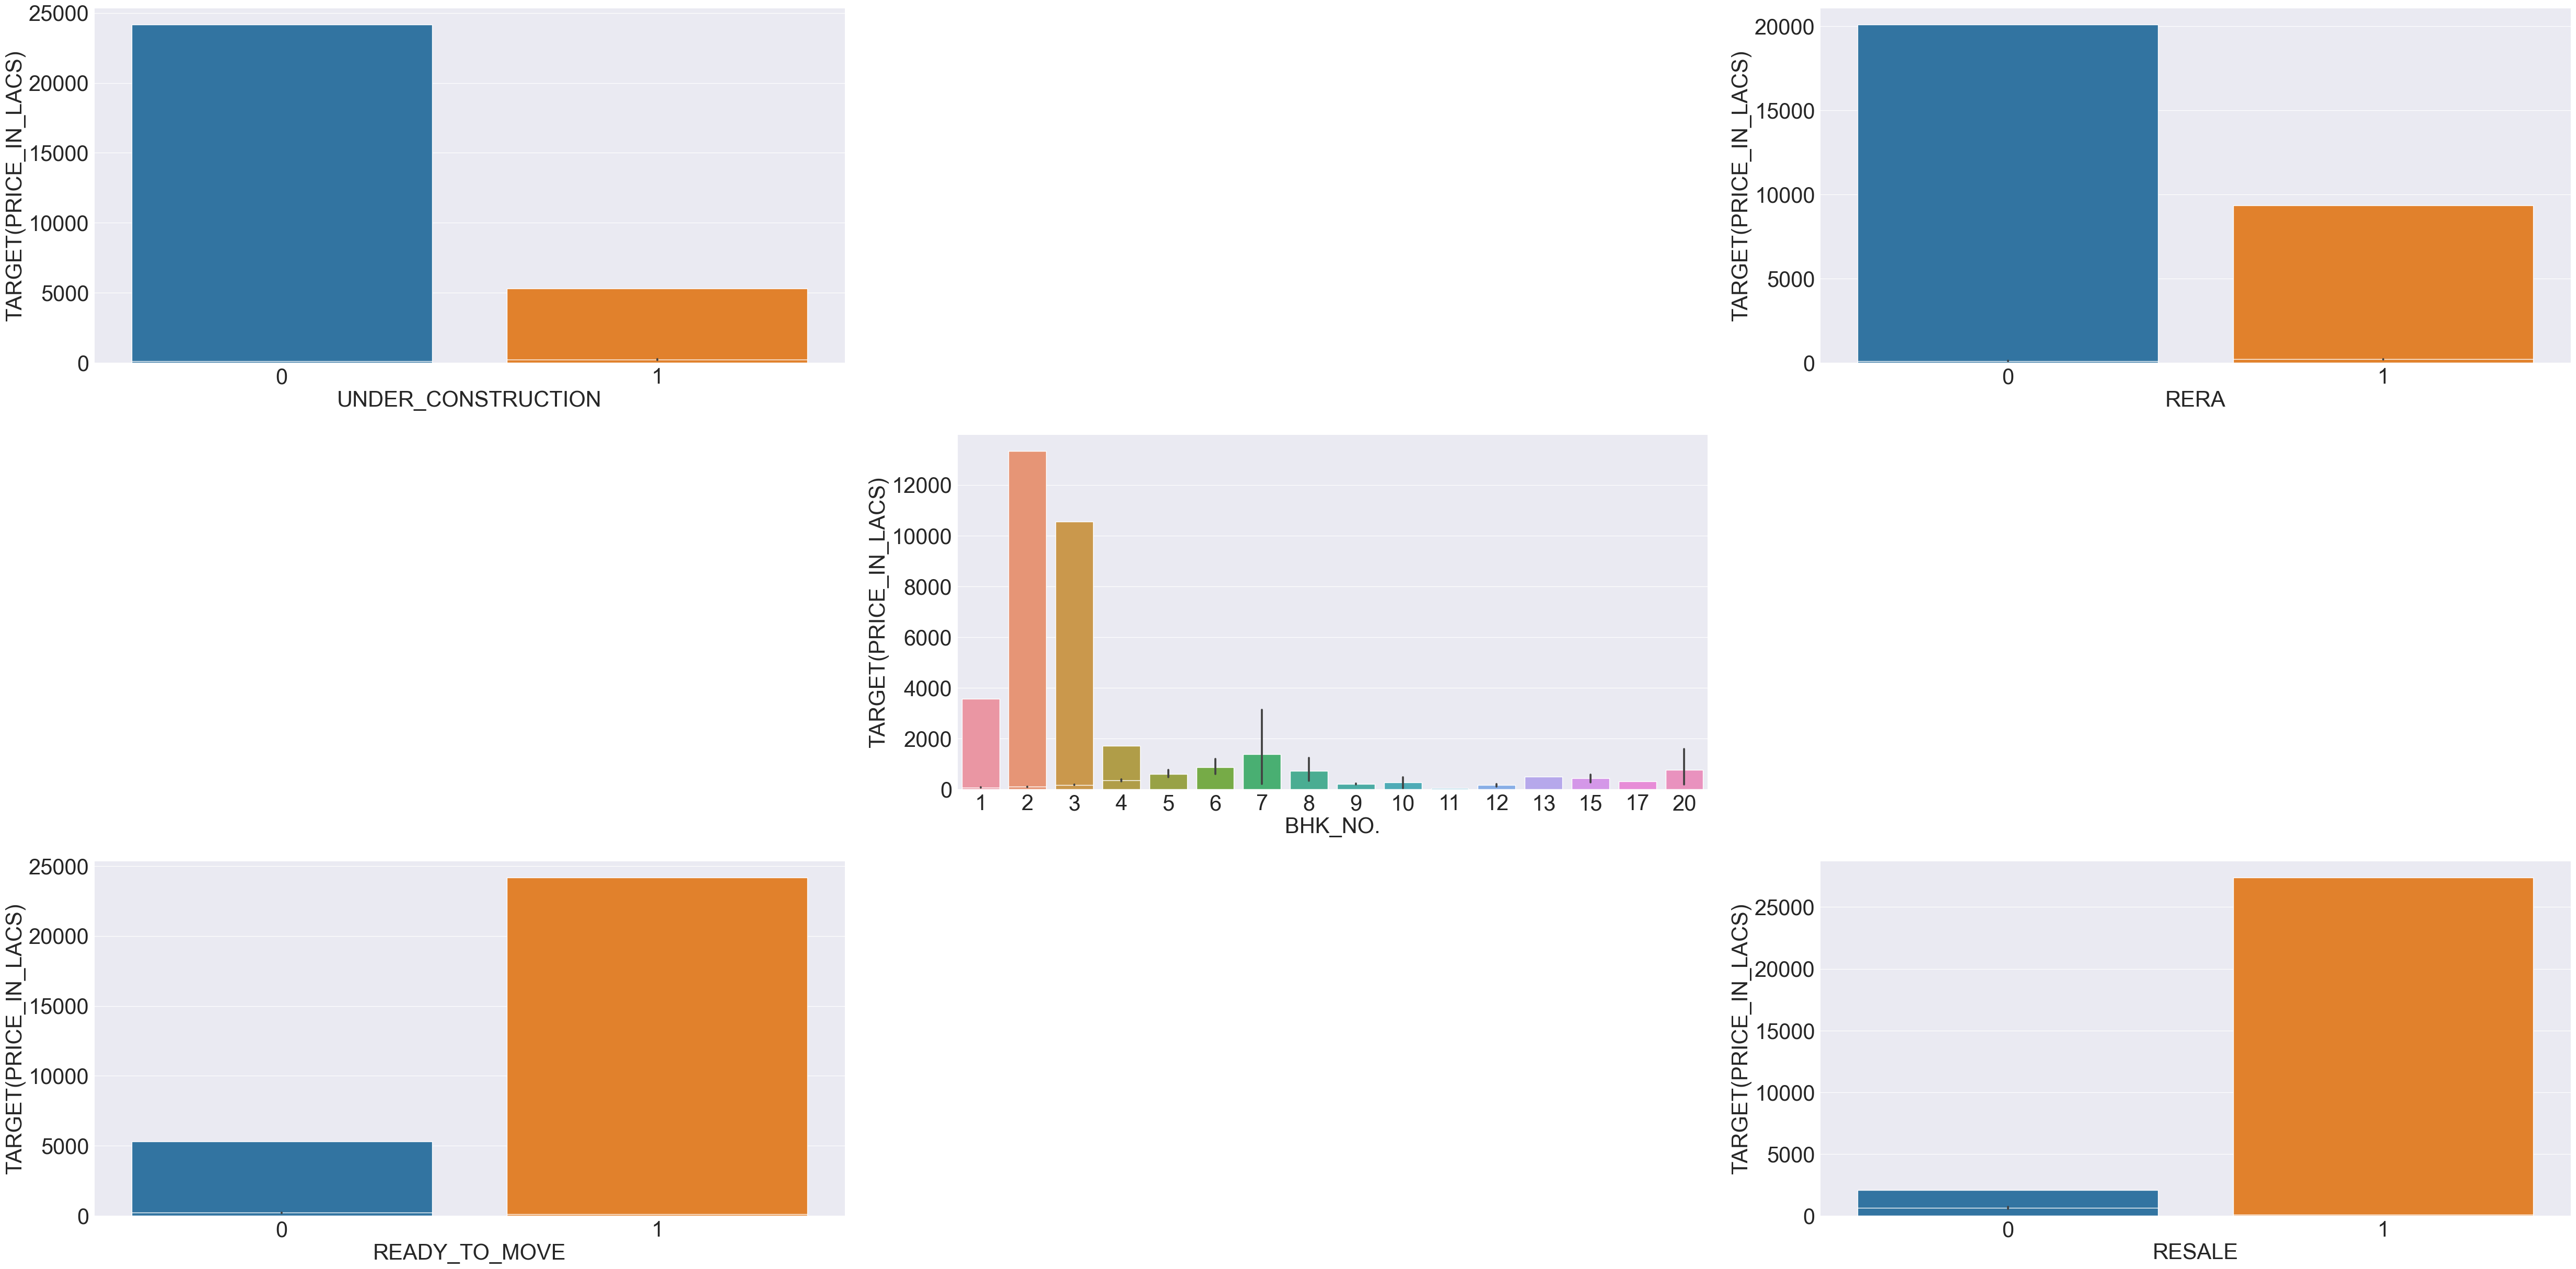

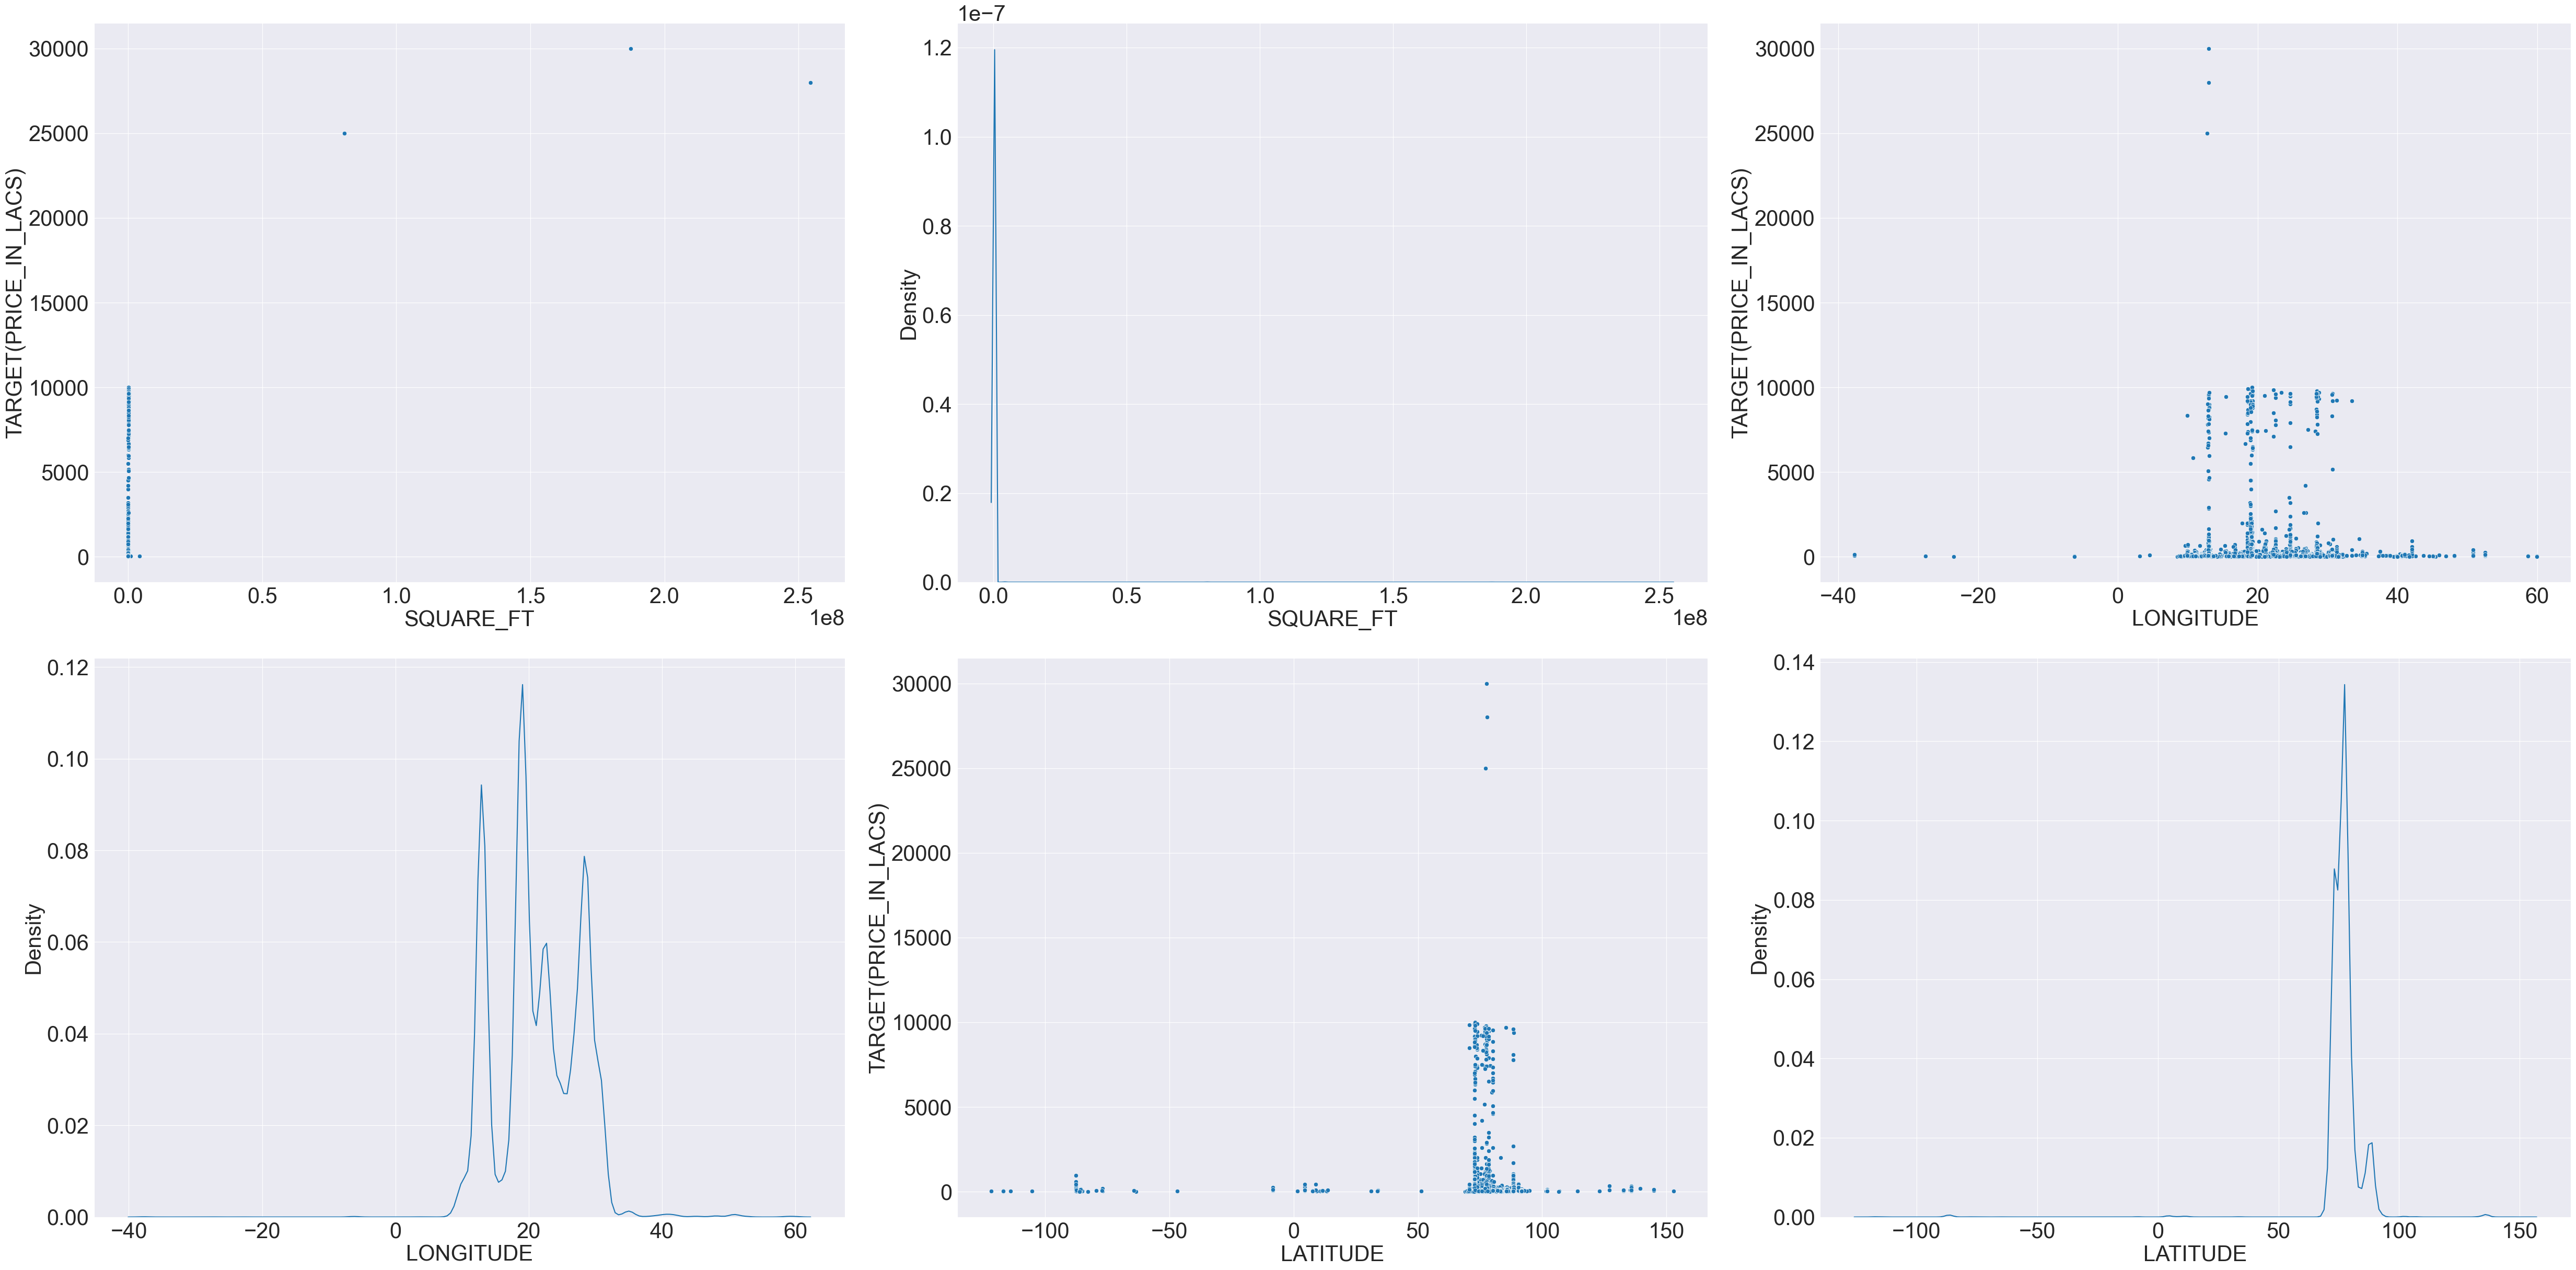

In [53]:
plt.figure(figsize=(60,60))
i=1
for columns in myData.select_dtypes(include='object'):
    plt.subplot(2,4,i)
    sns.countplot(x=columns,data=myData)
    i+=1
    plt.subplot(2,4,i)
    sns.barplot(y=target,x=columns,data=myData)
    i+=1
plt.tight_layout()


plt.figure(figsize=(50,50))
plt.rc('font', size=30)
j=1
for columns in num_cat_col:
    plt.subplot(3,3,j)
    sns.countplot(x=columns,data=myData)
    j+=1
    sns.barplot(y=target,x=columns,data=myData)
    j+=1
plt.tight_layout()


plt.figure(figsize=(50,25))
plt.rc('font', size=30)
j=1
for columns in num_col:
    plt.subplot(2,3,j)
    sns.scatterplot(y=target,x=columns,data=myData)
    j+=1
    plt.subplot(2,3,j)
    sns.kdeplot(x=columns,data=myData)
    j+=1
plt.tight_layout()

----
## Preparing the Data


### Split data

In [54]:
# Split the data into features and target label
Target_raw = myData[target]
Features_raw = myData.drop(target, axis = 1)


In [55]:
display(Target_raw.head(10))
display(Features_raw.head(10))

0    55.0
1    51.0
2    43.0
3    62.5
4    60.5
5    42.0
6    66.5
7    52.0
8    41.6
9    36.0
Name: TARGET(PRICE_IN_LACS), dtype: float64

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,Kolkata
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,Kochi
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,Jaipur
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,Mohali
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,Bangalore
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,Chennai


In [56]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler


features_log_transformed = pd.DataFrame(data = Features_raw)

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['SQUARE_FT', 'LONGITUDE', 'LATITUDE']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 10))


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,CITY
0,Owner,0,0,2,BHK,0.000005,1,1,"Ksfc Layout,Bangalore",0.519154,0.725671,Bangalore
1,Dealer,0,0,2,BHK,0.000005,1,1,"Vishweshwara Nagar,Mysore",0.512032,0.722201,Mysore
2,Owner,0,0,2,BHK,0.000004,1,1,"Jigani,Bangalore",0.517189,0.725796,Bangalore
3,Owner,0,1,2,BHK,0.000004,1,1,"Sector-1 Vaishali,Ghaziabad",0.679690,0.724748,Ghaziabad
4,Dealer,1,0,2,BHK,0.000004,0,1,"New Town,Kolkata",0.617717,0.765300,Kolkata
5,Owner,0,0,3,BHK,0.000005,1,1,"South Chittoor,Kochi",0.489074,0.720883,Kochi
6,Dealer,0,0,3,BHK,0.000006,1,1,"Sodala,Jaipur",0.662010,0.719110,Jaipur
7,Owner,0,1,3,BHK,0.000005,1,1,"Kharar,Mohali",0.701177,0.722220,Mohali
8,Dealer,0,1,2,BHK,0.000004,1,1,"Bileshivale,Bangalore",0.520018,0.725948,Bangalore
9,Owner,0,1,2,BHK,0.000003,1,1,"Chromepet,Chennai",0.518967,0.734928,Chennai


"X = myData.loc[:, ('POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE', 'CITY')].values\ny = myData.iloc[:, -2].values\nLE = LabelEncoder()\n\n# Encode Column CITY\nX[:, 10] = LE.fit_transform(X[:, 10])\n\n# Encode Column BHK_OR_RK\nX[:, 4] = LE.fit_transform(X[:, 4])\n\n# Encode Column POSTED_BY\nCT = ColumnTransformer(transformers=[('encode', OneHotEncoder(), [0])], remainder='passthrough')\nX = np.array(CT.fit_transform(X))\n\ndisplay(X)"

### Implementation: Data Preprocessing

In [57]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
Features_Final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
Target_Final = Target_raw

# Print the number of features after one-hot encoding
encoded = list(Features_Final.columns)

print("{} total features after one-hot encoding.".format(len(encoded)))
print("="*50)
display(Features_Final.head(n=10))
print("="*100)
display(Target_Final.head(n=10))


7168 total features after one-hot encoding.


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,...,CITY_Vellore,CITY_Vidisha,CITY_Vijayawada,CITY_Visakhapatnam,CITY_Visnagar,CITY_Vizianagaram,CITY_Warangal,CITY_Wardha,CITY_Washim,CITY_Yavatmal
0,0,0,2,0.000005,1,1,0.519154,0.725671,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0.000005,1,1,0.512032,0.722201,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0.000004,1,1,0.517189,0.725796,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2,0.000004,1,1,0.679690,0.724748,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,0.000004,0,1,0.617717,0.765300,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,3,0.000005,1,1,0.489074,0.720883,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,3,0.000006,1,1,0.662010,0.719110,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,1,3,0.000005,1,1,0.701177,0.722220,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,2,0.000004,1,1,0.520018,0.725948,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,1,2,0.000003,1,1,0.518967,0.734928,0,0,...,0,0,0,0,0,0,0,0,0,0


0    55.0
1    51.0
2    43.0
3    62.5
4    60.5
5    42.0
6    66.5
7    52.0
8    41.6
9    36.0
Name: TARGET(PRICE_IN_LACS), dtype: float64

### Shuffle and Split Data
Now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [58]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Features_Final, 
                                                    Target_Final, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 23560 samples.
Testing set has 5891 samples.


----
## Evaluating Model Performance
In this section, I will investigate different algorithms, and determine which is best at modeling the data.

In [59]:
#Delete
"""# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train,y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results"""

'# Import two metrics from sklearn - fbeta_score and accuracy_score\nfrom sklearn.metrics import fbeta_score, accuracy_score\n\ndef train_predict(learner, sample_size, X_train, y_train, X_test, y_test): \n    \'\'\'\n    inputs:\n       - learner: the learning algorithm to be trained and predicted on\n       - sample_size: the size of samples (number) to be drawn from training set\n       - X_train: features training set\n       - y_train: income training set\n       - X_test: features testing set\n       - y_test: income testing set\n    \'\'\'\n    \n    results = {}\n    \n    # Fit the learner to the training data using slicing with \'sample_size\' using .fit(training_features[:], training_labels[:])\n    start = time() # Get start time\n    learner = learner.fit(X_train,y_train)\n    end = time() # Get end time\n    \n    # Calculate the training time\n    results[\'train_time\'] = end - start\n        \n    # Get the predictions on the test set(X_test),\n    #       then get pred

In [87]:
# Calculate accuracy, precision and recall
TP = np.sum(Target_Final)
FP = Target_Final.count() - TP
TN = 0
FN = 0

accuracy = TP/(TP+FP)
recall = TP/(TP+FN)       # Recall = 1
precision = TP/(TP+FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta**2)*(precision*recall)/((beta**2*precision)+recall)

In [61]:
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn import svm

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor, AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer


In [62]:
display(X_train)
display(y_train)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,...,CITY_Vellore,CITY_Vidisha,CITY_Vijayawada,CITY_Visakhapatnam,CITY_Visnagar,CITY_Vizianagaram,CITY_Warangal,CITY_Wardha,CITY_Washim,CITY_Yavatmal
13260,0,1,2,0.000004,1,1,0.639208,0.728659,0,1,...,0,0,0,0,0,0,0,0,0,0
16626,1,1,2,0.000005,0,1,0.520018,0.725948,0,1,...,0,0,0,0,0,0,0,0,0,0
15190,1,1,2,0.000002,0,0,0.639208,0.728659,0,1,...,0,0,0,0,0,0,0,0,0,0
4802,0,1,3,0.000006,1,1,0.520036,0.725759,0,1,...,0,0,0,0,0,0,0,0,0,0
23407,0,0,3,0.000006,1,1,0.520036,0.725759,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0,0,2,0.000005,1,1,0.675264,0.722987,0,1,...,0,0,0,0,0,0,0,0,0,0
19648,1,1,3,0.000007,0,1,0.700381,0.722848,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,0,0,4,0.000009,1,1,0.614611,0.709401,0,0,...,0,0,0,0,0,0,0,0,0,0
10799,0,1,2,0.000004,1,1,0.678925,0.724889,0,0,...,0,0,0,0,0,0,0,0,0,0


13260    120.0
16626    110.0
15190    100.0
4802     100.0
23407     80.0
         ...  
13123     33.0
19648     60.0
9845      90.0
10799     60.0
2732      75.5
Name: TARGET(PRICE_IN_LACS), Length: 23560, dtype: float64

In [63]:
"""clf_A = LogisticRegression(random_state=7)      
clf_B = DecisionTreeClassifier()                
clf_C = AdaBoostClassifier(random_state=7)
clf_D = SGDClassifier(random_state = 7)
clf_E = svm.SVC()                               
clf_F = RandomForestClassifier(random_state=7)"""


Algorithms=[
    LinearRegression(n_jobs=1),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(n_estimators=200,learning_rate=0.1),
    RandomForestRegressor(n_estimators=200,n_jobs=-1),
    AdaBoostRegressor(n_estimators=200,learning_rate=0.1),
]

In [64]:
def FitModel(model_list):
    print("-"*60)
    print(f"Started Fitting {Algo_name}...")
    for Algo in model_list:
        Algo_name=Algo.__class__.__name__
        Algo.fit(X_train,y_train)
        print(f"Fitting {Algo_name} done")
        print("-"*60)

def PredictModel(model_list):
    print("-"*60)
    print(f"Started Predicting {Algo_name}...")
    for Algo in model_list:
        Algo_name=Algo.__class__.__name__
        y_predict = Algo.predict(X_test)
        np.set_printoptions(precision=2)
        print(np.concatenate((y_predict.reshape(len(y_predict), 1), y_test.reshape(len(y_test), 1)), 1))
        print(f"Predicting {Algorithms} done")
        print("-"*60)

In [65]:
%%time
FitModel(Algorithms)


------------------------------------------------------------
Fitting DecisionTreeRegressor done
------------------------------------------------------------
Fitting LinearRegression done
------------------------------------------------------------
Fitting RandomForestRegressor done
------------------------------------------------------------
Fitting AdaBoostRegressor done
------------------------------------------------------------
Fitting GradientBoostingRegressor done
------------------------------------------------------------
CPU times: total: 37min 57s
Wall time: 29min 11s


In [66]:
"""print("Now Running Extra Algorithms...")

Extra_Algorithms_Results = {}
print("Started Trainnig Good Algorithms...")
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    print("\n", "=" * 100)
    print(clf, " Started Training")
    clf_name = clf.__class__.__name__
    Extra_Algorithms_Results[clf_name] = {}
    for i, samples in enumerate([len(y_train)]): 
        Extra_Algorithms_Results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)"""

'print("Now Running Extra Algorithms...")\n\nExtra_Algorithms_Results = {}\nprint("Started Trainnig Good Algorithms...")\nfor clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:\n    print("\n", "=" * 100)\n    print(clf, " Started Training")\n    clf_name = clf.__class__.__name__\n    Extra_Algorithms_Results[clf_name] = {}\n    for i, samples in enumerate([len(y_train)]): \n        Extra_Algorithms_Results[clf_name][i] =         train_predict(clf, samples, X_train, y_train, X_test, y_test)'

# Testing

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.exceptions import NotFittedError

score_dict={}
j=0

# Function for determining the best Algorithm
def Algo_Tester(model_list):
    for i,reg in enumerate(model_list):
        
        reg_name = reg.__class__.__name__
        pred=None

        try:
            pred=reg.predict(X_test)
        except NotFittedError as e:
            raise(e)    
        
        print("-"*80)
        print(f"Predicitng {reg_name:40} done")
        
        score_dict[reg_name]={
            "R2 Score":r2_score(y_test,pred),
            "Root Mean Squared Error": mean_squared_error(y_test,pred, squared=False),
            "Mean Absolute Error Score": mean_absolute_error(y_test,pred),
            "Mean Squared Error Score": mean_squared_error(y_test,pred),
            'model_index':int(i)
        }
        j=i
    
    print("-"*80)
    
    return j

In [68]:
Best_Algorithm=Algo_Tester(Algorithms)

--------------------------------------------------------------------------------
Predicitng DecisionTreeRegressor                    done
--------------------------------------------------------------------------------
Predicitng LinearRegression                         done
--------------------------------------------------------------------------------
Predicitng RandomForestRegressor                    done
--------------------------------------------------------------------------------
Predicitng AdaBoostRegressor                        done
--------------------------------------------------------------------------------
Predicitng GradientBoostingRegressor                done
--------------------------------------------------------------------------------


In [69]:
display(Best_Algorithm)

4

In [70]:
Algo_Analysis=pd.DataFrame(score_dict).transpose().sort_values('R2 Score')
Algo_Analysis

,R2 Score,Root Mean Squared Error,Mean Absolute Error Score,Mean Squared Error Score,model_index
GradientBoostingRegressor,9.585767e-01,1.378934e+02,4.444010e+01,1.901460e+04,4.0
DecisionTreeRegressor,9.467646e-01,1.563226e+02,2.975946e+01,2.443676e+04,0.0
RandomForestRegressor,9.061048e-01,2.076075e+02,2.708943e+01,4.310088e+04,2.0
AdaBoostRegressor,8.879684e-01,2.267732e+02,1.662544e+02,5.142608e+04,3.0
LinearRegression,-1.198572e+20,7.417431e+12,9.910377e+11,5.501829e+25,1.0


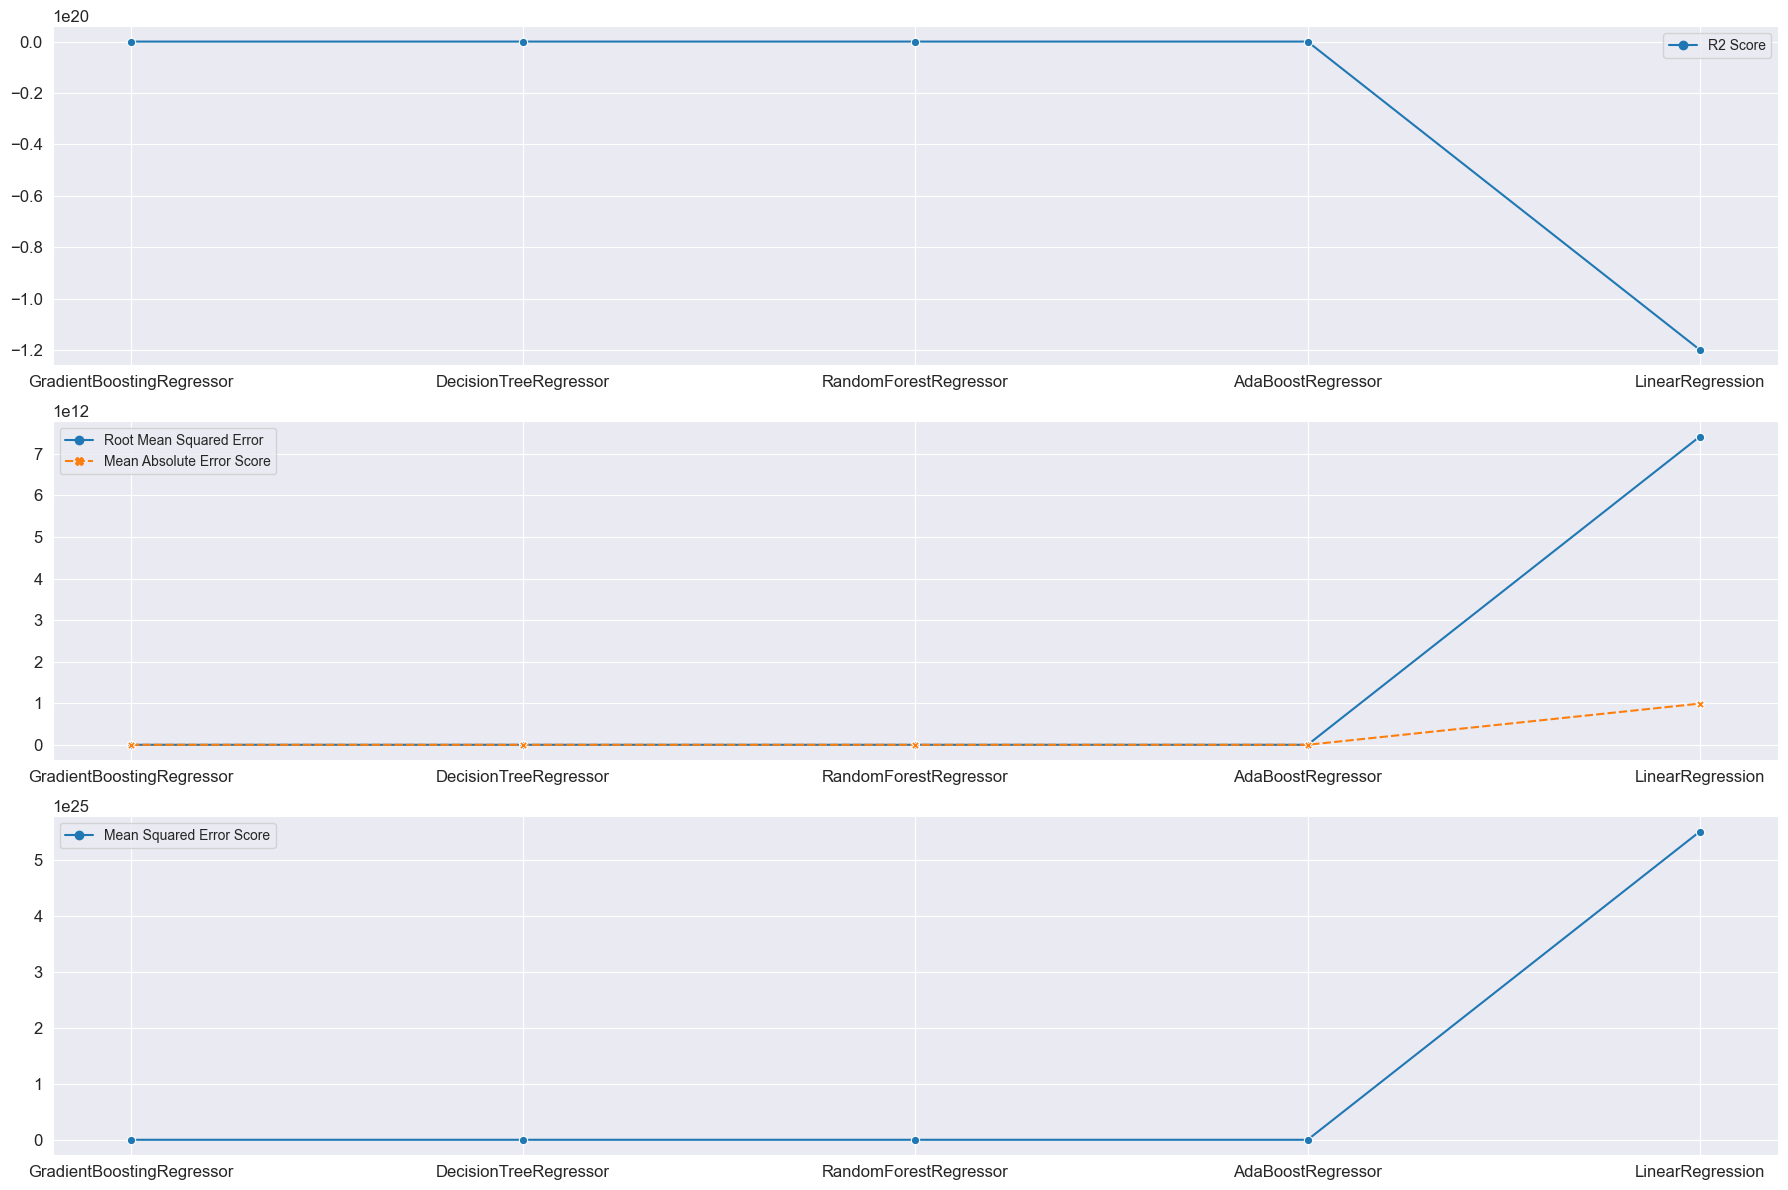

In [83]:
fig,ax=plt.subplots(3,1,figsize=(18,12))
plt.rc('font', size=10)
sns.lineplot(data=Algo_Analysis.iloc[:,[0]],markers=True,ax=ax[0])
sns.lineplot(data=Algo_Analysis.iloc[:,[1,2]],markers=True,ax=ax[1])
sns.lineplot(data=Algo_Analysis.iloc[:,[3]],markers=True,ax=ax[2])
plt.tight_layout()
plt.show()

# Best Model Choosen

In [84]:
Algo_Analysis.iloc[[0],:]

,R2 Score,Root Mean Squared Error,Mean Absolute Error Score,Mean Squared Error Score,model_index
GradientBoostingRegressor,0.958577,137.893439,44.440104,19014.600474,4.0


In [105]:
ChoosenOne = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1)

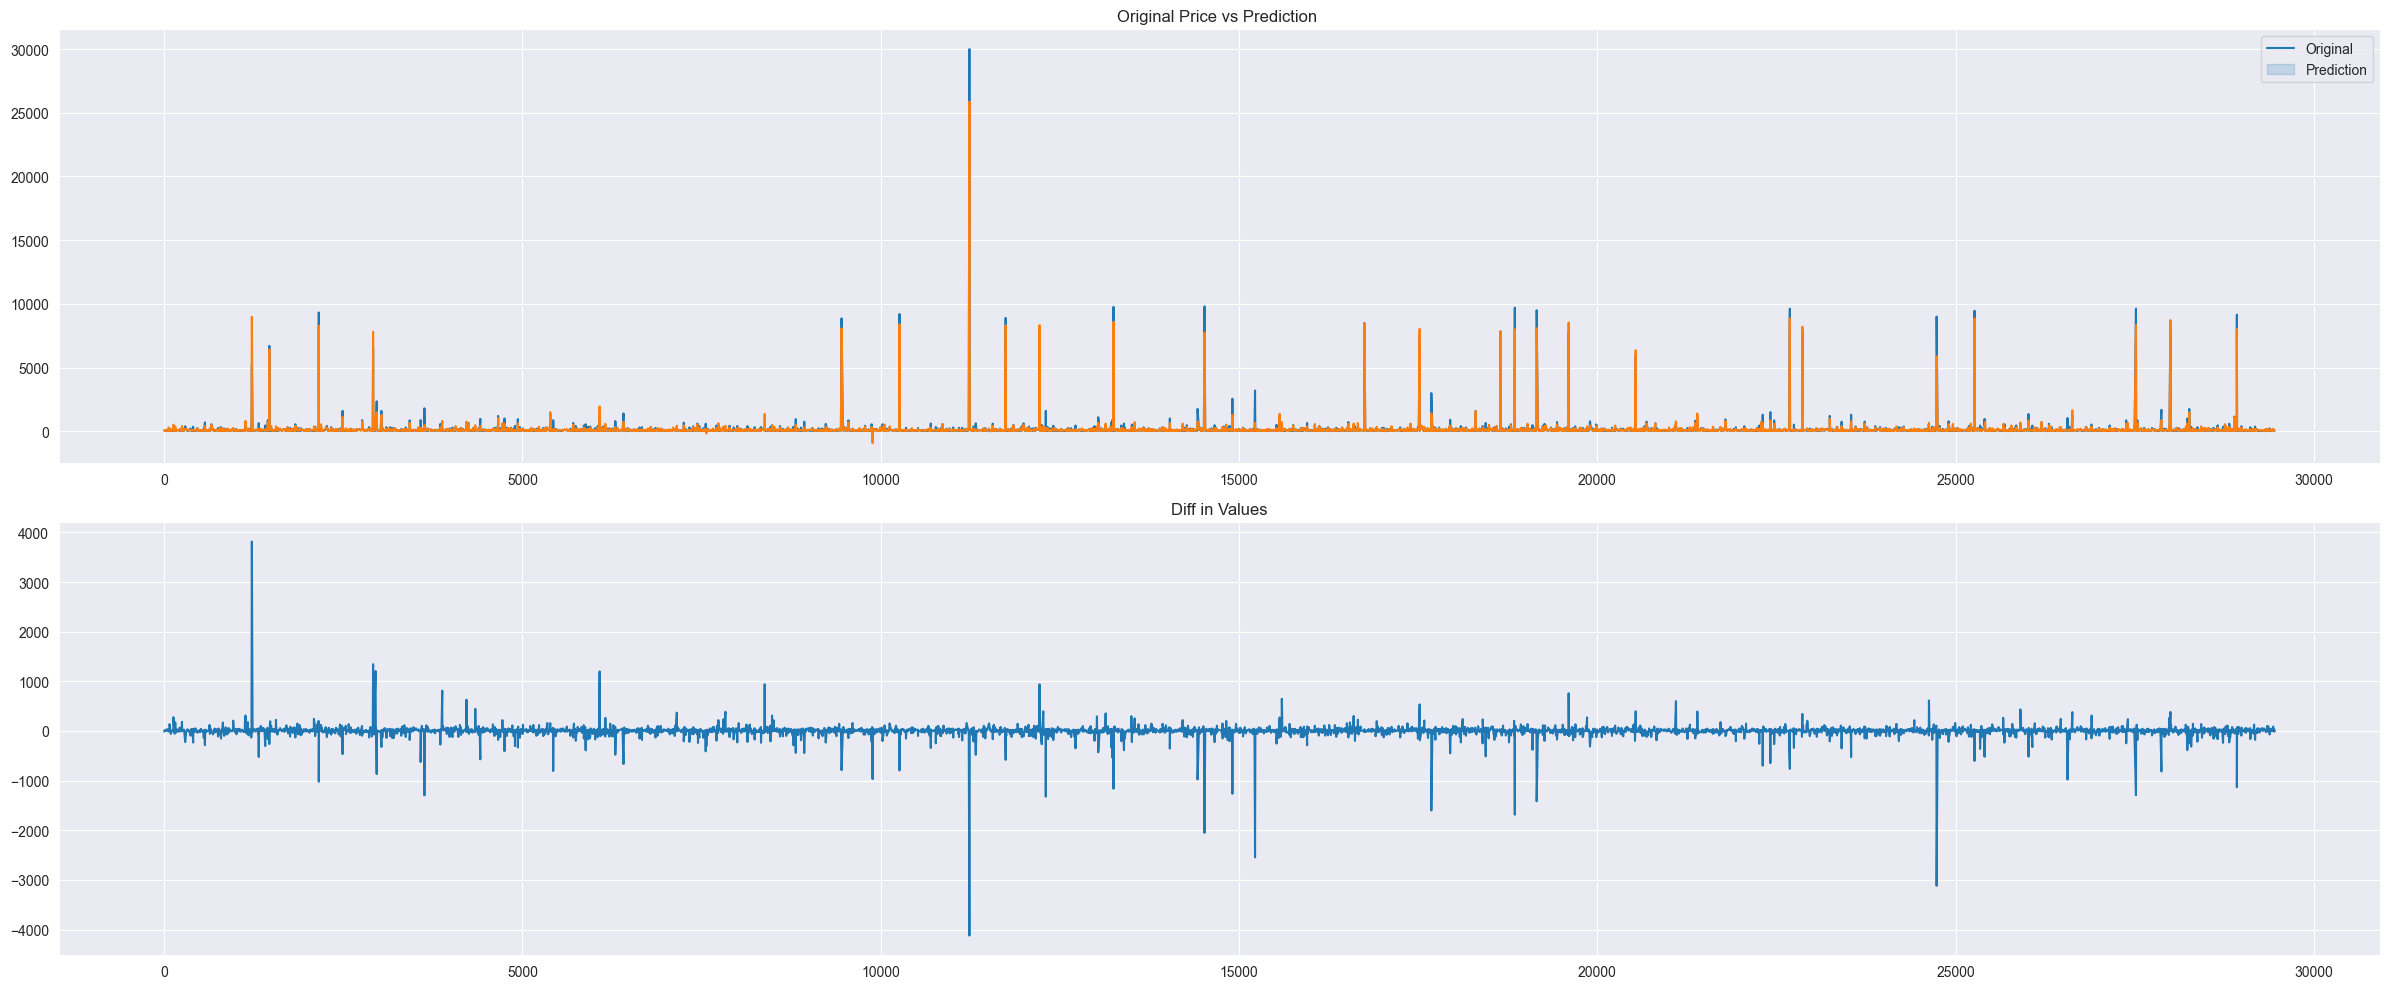

In [86]:
pred = ChoosenOne.predict(X_test)
Differance = pred - y_test.values.ravel()

fig,ax=plt.subplots(2,1,figsize=(24,10))
sns.lineplot(y=y_test.values.ravel(),x=y_test.index,legend=False,ax=ax[0])
sns.lineplot(y=pred,x=y_test.index,legend=False,ax=ax[0])
sns.lineplot(y=Differance,x=y_test.index,legend="full",ax=ax[1])
ax[0].set_title('Original Price vs Prediction ')
ax[0].legend(['Original','Prediction'])
ax[1].set_title('Differance in Values')
plt.tight_layout()
plt.show()

# Hyper parameter tuning

In [106]:
# Import
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score, accuracy_score

parameters = dict(n_estimators=np.arange(50,110,10),learning_rate=np.arange(0.01,0.07,0.01))

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=ChoosenOne,param_grid=parameters,scoring = scorer)

In [107]:
%%time
grid_obj.fit(X_train,y_train.values.ravel())

c:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 220, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "c:\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 268, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
                 ^

In [ ]:
print("Fitting...")
# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (ChoosenOne.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))